In [1]:

import numpy as np

import seaborn as sns
sns.set(style="ticks")


from matplotlib import pyplot as plt
from crawlab_toolbox import plotting as genplt
from sklearn.metrics import confusion_matrix
import os
from scipy.stats import describe

import matplotlib.colors as colors

from joblib import dump, load
import datetime

In [2]:
clf_good_v2 = np.load('data/classification-Good-v2.npy',allow_pickle=True)
clf_bad_v2 = np.load('data/classification-Bad-v2.npy',allow_pickle=True)

clf_good_v2 = 1 - clf_good_v2
clf_bad_v2 = 1 - clf_bad_v2 

true_good_v2 = np.zeros_like(clf_good_v2)
true_bad_v2 = np.ones_like(clf_bad_v2)

pred_v2 = np.round(np.concatenate((clf_good_v2,clf_bad_v2)))
true_v2 = np.concatenate((true_good_v2,true_bad_v2))


clf_good_v1 = np.load('data/classification-Good-v1.npy',allow_pickle=True)
clf_bad_v1 = np.load('data/classification-Bad-v1.npy',allow_pickle=True)

true_good_v1 = np.zeros_like(clf_good_v1)
true_bad_v1 = np.ones_like(clf_bad_v1)

pred_v1 = np.round(np.concatenate((clf_good_v1,clf_bad_v1)))
true_v1 = np.concatenate((true_good_v1,true_bad_v1))



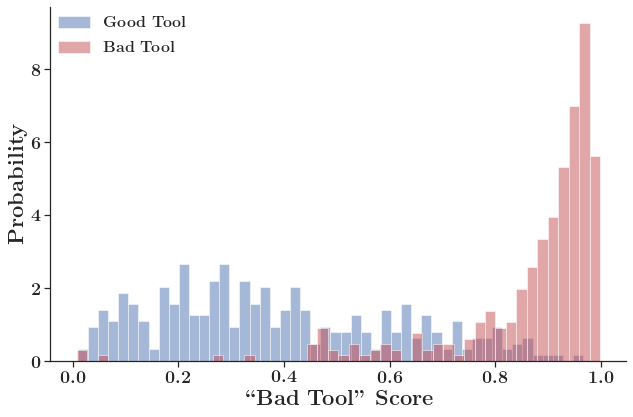

In [3]:
num_col = 1
legend_loc = 'best'
transparent=True
plt.figure(figsize=(9,6))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(clf_good_v1, 50, density=True, facecolor='b', alpha=0.50,label=r'\textbf{Good Tool}')
n, bins, patches = plt.hist(clf_bad_v1, 50, density=True, facecolor='r', alpha=0.50,label=r'\textbf{Bad Tool}')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{``Bad Tool" Score}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.tight_layout(pad=1.2) 
plt.savefig('figures/classification-compare-v1.svg',transparent=True)     
plt.show()

In [4]:
clf_good_v1.shape

(335, 1)

In [5]:
clf_bad_v1.shape

(332, 1)

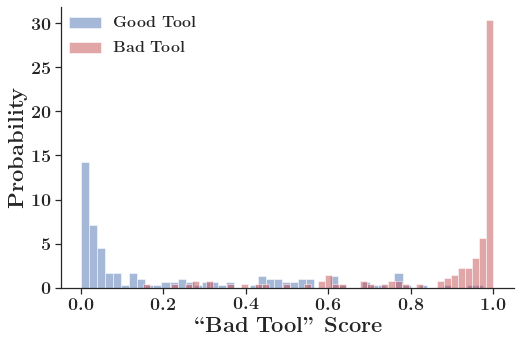

In [32]:
num_col = 1
legend_loc = 'best'
transparent=True
plt.figure(figsize=(9,6))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(clf_good_v2, 50, density=True, facecolor='b', alpha=0.50,label=r'\textbf{Good Tool}')
n, bins, patches = plt.hist(clf_bad_v2, 50, density=True, facecolor='r', alpha=0.50,label=r'\textbf{Bad Tool}')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{``Bad Tool" Score}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.savefig('figures/classification-compare-v2.svg',transparent=True)     
plt.show()

In [8]:
def fit_statistics(y_true, y_pred):

    conf_matrix = np.round(confusion_matrix(y_true, y_pred) / y_pred.shape[0],2)
    
    # Null hypothesis: tool is healthy
    # Positive: Tool is unhealthy
    # Negative: Tool is healthy
    
    true_positive = conf_matrix[0,0]
    true_negative = conf_matrix[1,1]
    
    # False positive: tool is actually healthy but classified as unhealthy
    # | - | X |
    # | - | - |
    false_positive = conf_matrix[0,1]
    
    # False negative: tool is actually unhealthy but classified as healthy
    # | - | - |
    # | X | - |
    false_negative = conf_matrix[1,0]
    
    # Precision: Quantifies false positives
    # Recall: Quantifies false negatives
    
    if true_positive == 0 and false_positive == 0.:
        precision = 0.
    else:
        precision = true_positive / (true_positive + false_positive)
    
    if true_positive == 0. and false_negative == 0.:
        recall = 0.
        true_positive_rate = 0.
    else:
        recall = true_positive / (true_positive + false_negative)
        true_positive_rate = true_positive / (true_positive + false_negative)

    if true_negative == 0. and false_positive == 0.:
        true_negative_rate = 0.
    else:
        true_negative_rate = true_negative / (true_negative + false_positive)
    
    balanced_accuracy = (true_positive_rate + true_negative_rate) / 2
    
    return balanced_accuracy, true_positive_rate, true_negative_rate, precision, recall
 

In [9]:
fit_statistics(true_v1,pred_v1)

(0.853925353925354,
 0.9459459459459459,
 0.7619047619047619,
 0.7,
 0.9459459459459459)

In [10]:
fit_statistics(true_v2,pred_v2)

(0.884090909090909,
 0.9318181818181819,
 0.8363636363636363,
 0.82,
 0.9318181818181819)

In [11]:
step = 20
numSteps = np.floor(clf_good_v1.shape[0] / step).astype(int)

In [12]:
clf_good_control = clf_good_v1[:step * np.floor(clf_good_v1.shape[0] / step).astype(int)].reshape(np.floor(clf_good_v1.shape[0] / step).astype(int),step)
clf_bad_control = clf_bad_v1[:step * np.floor(clf_bad_v1.shape[0] / step).astype(int)].reshape(np.floor(clf_bad_v1.shape[0] / step).astype(int),step)

In [13]:
x_bad = np.mean(clf_bad_control,axis=1)
x_good = np.mean(clf_good_control,axis=1)

r_bad = np.amax(clf_bad_control,axis=1) - np.amin(clf_bad_control,axis=1)
r_good = np.amax(clf_good_control,axis=1) - np.amin(clf_good_control,axis=1)

trial = np.floor(r_good.shape[0] * 0.25).astype(int)

In [14]:
A1 = 0.697
A2 = 0.180
d2 = 3.735
D3 = 0.414
D4 = 1.586

In [15]:
r_bar = np.mean(r_good[:trial])
x_dbar = np.mean(x_good[:trial])

x_ucl = x_dbar + A2 * r_bar
x_lcl = x_dbar - A2 * r_bar

r_ucl =  D4 * r_bar
r_lcl =  D3 * r_bar

In [16]:
print(r_bar)
print(r_ucl)
print(r_lcl)
print(r_good[:trial].shape)

0.70647101045559
1.1204630225825658
0.29247899832861424
(4,)


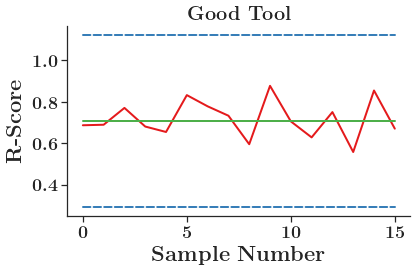

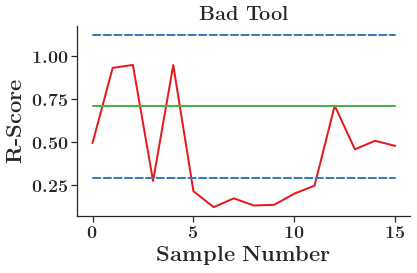

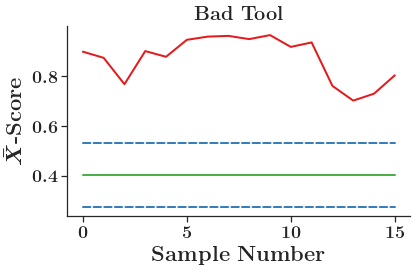

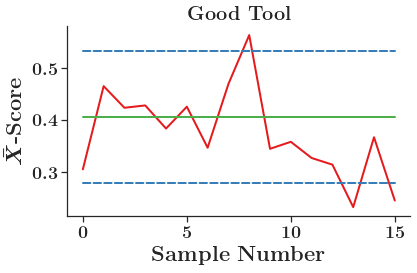

In [17]:
# rcParams['axes.prop_cycle'] = cycler('color', ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628'])
    

plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()
plt.plot(r_good.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(r_good) * r_bar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(r_good) * r_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(r_good) * r_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{R-Score}', labelpad=5)
plt.title(r'\textbf{Good Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/R-Good.svg',transparent=True)    
plt.show()


plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(r_bad.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(r_good) * r_bar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(r_good) * r_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(r_good) * r_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{R-Score}', labelpad=5)
plt.title(r'\textbf{Bad Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/R-Bad.svg',transparent=True)    
plt.show()


plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(x_bad.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(x_bad) * x_dbar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(x_bad) * x_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(x_bad) * x_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{$\bar{X}$-Score}', labelpad=5)
plt.title(r'\textbf{Bad Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/X-Bad.svg',transparent=True)    
plt.show()

plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(x_good.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(x_good) * x_dbar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(x_good) * x_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(x_good) * x_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{$\bar{X}$-Score}', labelpad=5)
plt.title(r'\textbf{Good Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/X-Good.svg',transparent=True)    
plt.show()

In [18]:
clf_good_control = clf_good_v2[:step * np.floor(clf_good_v2.shape[0] / step).astype(int)].reshape(np.floor(clf_good_v2.shape[0] / step).astype(int),step)
clf_bad_control = clf_bad_v2[:step * np.floor(clf_bad_v2.shape[0] / step).astype(int)].reshape(np.floor(clf_bad_v2.shape[0] / step).astype(int),step)

In [27]:
x_bad = np.mean(clf_bad_control,axis=1)
x_good = np.mean(clf_good_control,axis=1)

r_bad = np.amax(clf_bad_control,axis=1) - np.amin(clf_bad_control,axis=1)
r_good = np.amax(clf_good_control,axis=1) - np.amin(clf_good_control,axis=1)

trial = np.floor(r_good.shape[0] * 0.25).astype(int)

In [28]:
r_bar = np.mean(r_good[:trial])
x_dbar = np.mean(x_good[:trial])

x_ucl = x_dbar + A2 * r_bar
x_lcl = x_dbar - A2 * r_bar

r_ucl =  D4 * r_bar
r_lcl =  D3 * r_bar

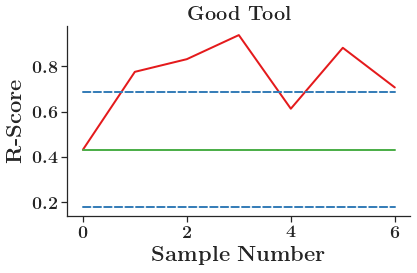

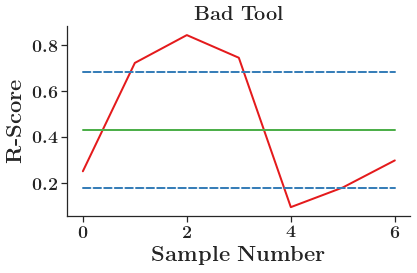

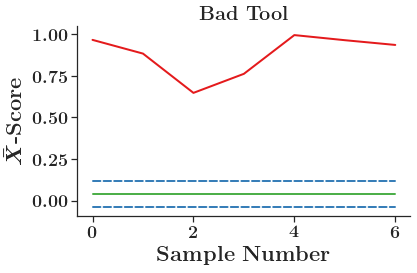

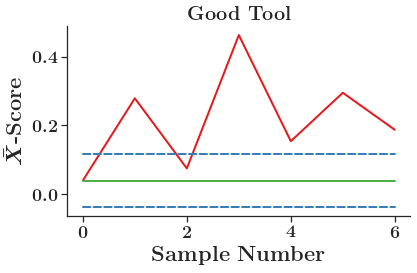

In [29]:
# rcParams['axes.prop_cycle'] = cycler('color', ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628'])
    

plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()
plt.plot(r_good.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(r_good) * r_bar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(r_good) * r_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(r_good) * r_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{R-Score}', labelpad=5)
plt.title(r'\textbf{Good Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/R-Good-v2.svg',transparent=True)    
plt.show()


plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(r_bad.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(r_good) * r_bar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(r_good) * r_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(r_good) * r_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{R-Score}', labelpad=5)
plt.title(r'\textbf{Bad Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/R-Bad-v2.svg',transparent=True)    
plt.show()


plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(x_bad.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(x_bad) * x_dbar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(x_bad) * x_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(x_bad) * x_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{$\bar{X}$-Score}', labelpad=5)
plt.title(r'\textbf{Bad Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/X-Bad-v2.svg',transparent=True)    
plt.show()

plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()

plt.plot(x_good.flatten(),color='#e41a1c',linewidth=2)
plt.plot(np.ones_like(x_good) * x_dbar,linestyle='solid',color='#4daf4a')
plt.plot(np.ones_like(x_good) * x_ucl,linestyle='dashed',color='#377eb8')
plt.plot(np.ones_like(x_good) * x_lcl,linestyle='dashed',color='#377eb8')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create the axis labels
plt.xlabel(r'\textbf{Sample Number}', labelpad=5)
plt.ylabel(r'\textbf{$\bar{X}$-Score}', labelpad=5)
plt.title(r'\textbf{Good Tool}',fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=1.2) 
plt.savefig('figures/X-Good-v2.svg',transparent=True)    
plt.show()